In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [3]:
selected_col= ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86','mths_since_last_record:>86']

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [4]:
inputs_train_with_ref_cat = loan_data_inputs_train[selected_col]
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

In [5]:
inputs_test_with_ref_cat = loan_data_inputs_test[selected_col]
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

inputs_train_np = inputs_train.to_numpy()
inputs_test_np = inputs_test.to_numpy()
loan_data_targets_train_np = loan_data_targets_train.to_numpy()
loan_data_targets_test_np = loan_data_targets_test.to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = inputs_train_np,inputs_test_np,loan_data_targets_train_np,loan_data_targets_test_np

# Calculate class weights for balancing
# class_weights = "balanced"


In [8]:

# Create a random forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())

# Get predicted probabilities for each class
proba_predictions = rf_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.74      0.25     10190
           1       0.94      0.50      0.65     83067

    accuracy                           0.53     93257
   macro avg       0.55      0.62      0.45     93257
weighted avg       0.85      0.53      0.61     93257



In [9]:
xg_classifier = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Train the classifier
xg_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = xg_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.61      0.27     10190
           1       0.93      0.63      0.75     83067

    accuracy                           0.63     93257
   macro avg       0.55      0.62      0.51     93257
weighted avg       0.85      0.63      0.70     93257



In [10]:
import lightgbm as lgb


lgb_classifier = lgb.LGBMClassifier(n_estimators=1000, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = lgb_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.71      0.27     10190
           1       0.94      0.58      0.72     83067

    accuracy                           0.59     93257
   macro avg       0.56      0.64      0.50     93257
weighted avg       0.86      0.59      0.67     93257



In [11]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = mlp_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.79      0.26     10190
           1       0.95      0.49      0.65     83067

    accuracy                           0.52     93257
   macro avg       0.55      0.64      0.46     93257
weighted avg       0.86      0.52      0.60     93257



In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Function to generate classification report and additional features
def generate_report(classifier, X_train, X_test, y_train, y_test, threshold=0.9):
    # Train the classifier
    classifier.fit(X_train, y_train.ravel())  # Use ravel() to convert y_train to a 1D array

    # Get predicted probabilities for each class
    proba_predictions = classifier.predict_proba(X_test)

    # Set threshold and classify based on probabilities
    binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

    # Get the classification report
    report = classification_report(y_test, binary_predictions, digits=4, target_names=['Class 0', 'Class 1'], output_dict=True)

    # Additional features
    accuracy = classifier.score(X_test, y_test)
    other_features = {
        'Accuracy': accuracy,
        # Add more relevant features if needed
    }

    return report, other_features

# List of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=1000, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=1000, random_state=42),
    'MLP Classifier': MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10, 10, 5, 2), max_iter=500, random_state=42),
}

# Results table
results_table = []

# Iterate through classifiers
for name, classifier in classifiers.items():
    report, other_features = generate_report(classifier, X_train, X_test, y_train, y_test)
    
    # Append results to the table
    results_table.append({
        'Classifier': name,
        'Precision (Class 0)': report['Class 0']['precision'],
        'Recall (Class 0)': report['Class 0']['recall'],
        'F1-Score (Class 0)': report['Class 0']['f1-score'],
        'Precision (Class 1)': report['Class 1']['precision'],
        'Recall (Class 1)': report['Class 1']['recall'],
        'F1-Score (Class 1)': report['Class 1']['f1-score'],
        'Accuracy': other_features['Accuracy'],
        # Add more columns as needed
    })

# Create a DataFrame
results_df = pd.DataFrame(results_table)

# Display the DataFrame
# print(results_df)


[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745
       Classifier  Precision (Class 0)  Recall (Class 0)  F1-Score (Class 0)  \
0   Random Forest             0.152916          0.736310            0.253240   
1         XGBoost             0.169573          0.612659            0.265626   
2        LightGBM             0.170578          0.708243            0.274939   
3  MLP Classifier             0.159230          0.789009            0.264984   

   Precision (Class 1)  Recall (Class 1) 

In [16]:
results_df

,Classifier,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy
0,Random Forest,0.152916,0.736310,0.253240,0.939196,0.499645,0.652281,0.890432
1,XGBoost,0.169573,0.612659,0.265626,0.930069,0.631948,0.752559,0.887215
2,LightGBM,0.170578,0.708243,0.274939,0.941646,0.577546,0.715965,0.890593
3,MLP Classifier,0.159230,0.789009,0.264984,0.949724,0.488931,0.645532,0.890732


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import eli5

# Create a random forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())

# Get predicted probabilities for each class
proba_predictions = rf_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

# Explain global feature importance
feature_names = list(inputs_train)  # Convert to strings
eli5.explain_weights(rf_classifier, feature_names=feature_names)


In [ ]:

# Explain local prediction
sample_index = 0  # Replace with the index of the sample you want to explain
eli5.explain_prediction(rf_classifier, X_test[sample_index], feature_names=feature_names)


In [47]:
import lime
import lime.lime_tabular
import numpy as np

# Convert X_train to a NumPy array if it's not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, mode='classification', feature_names=list(inputs_train), random_state=42)

# Select a specific instance for local interpretation
instance_idx = 1  # Choose the index of the instance you want to interpret
instance = X_test_np[[instance_idx]]  # Use indexing for NumPy array

# Get the predicted probability for the selected instance
predicted_proba = xg_classifier.predict_proba(instance)

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(instance[0], xg_classifier.predict_proba, num_features=len(list(inputs_train)))

# Visualize the LIME explanation
explanation.show_in_notebook(show_table=False, show_all=False)


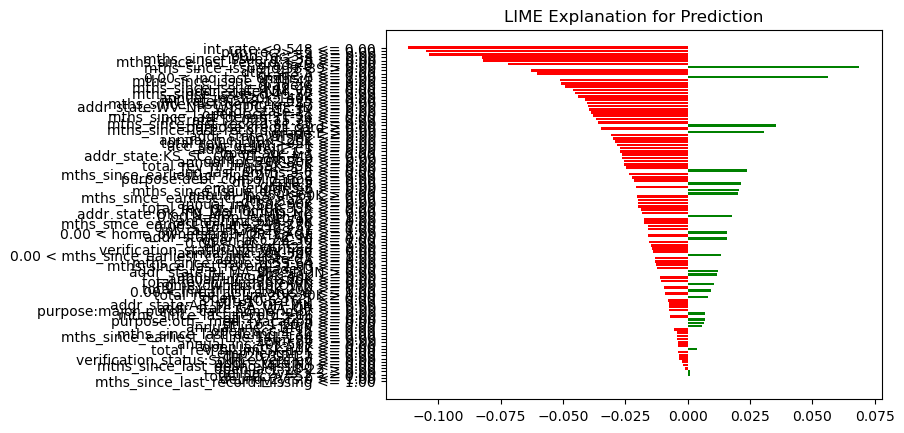

In [32]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Convert X_train to a NumPy array if it's not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, mode='classification', feature_names=list(inputs_train), random_state=42)

# Select a specific instance for local interpretation
instance_idx = 1  # Choose the index of the instance you want to interpret
instance = X_test_np[[instance_idx]]  # Use indexing for NumPy array

# Get the predicted probability for the selected instance
predicted_proba = xg_classifier.predict_proba(instance)

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(instance[0], xg_classifier.predict_proba, num_features=len(list(inputs_train)))

# Visualize the LIME explanation
fig = explanation.as_pyplot_figure()
plt.title('LIME Explanation for Prediction')
plt.show()


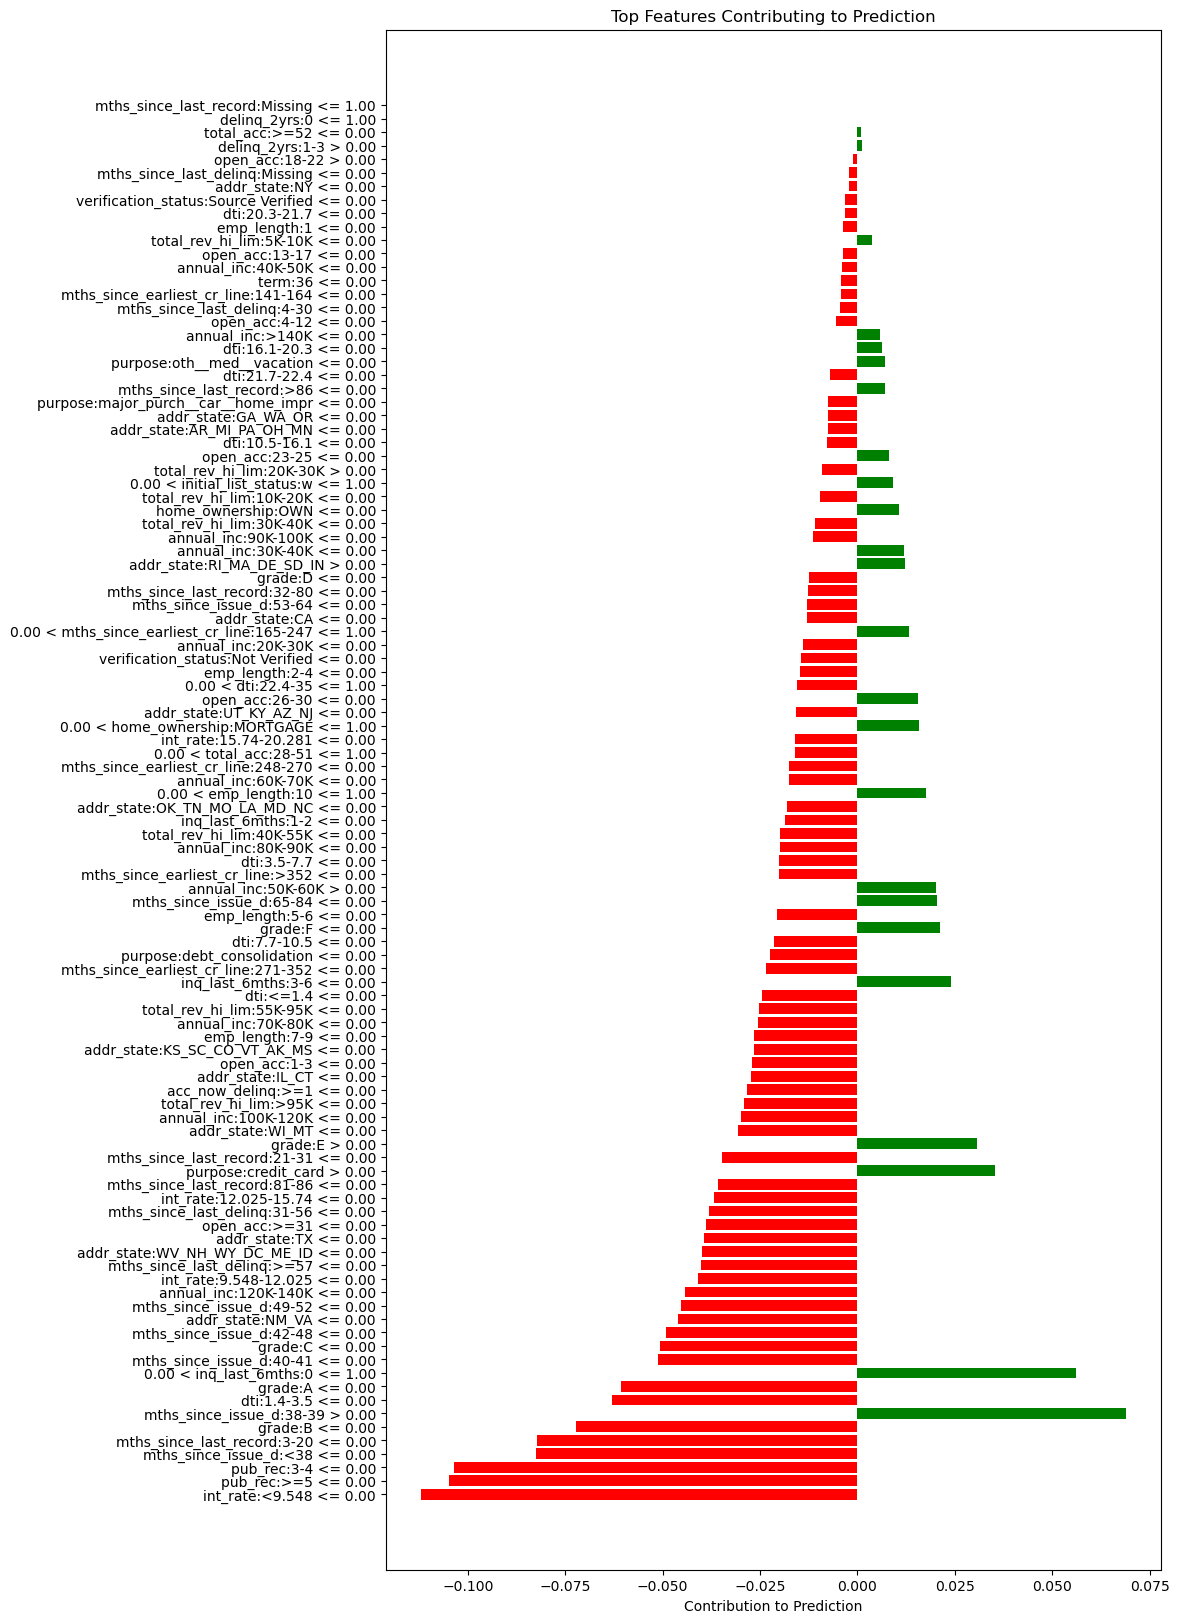

In [37]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Convert X_train to a NumPy array if it's not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, mode='classification', feature_names=list(inputs_train), random_state=42)

# Select a specific instance for local interpretation
instance_idx = 1  # Choose the index of the instance you want to interpret
instance = X_test_np[[instance_idx]]  # Use indexing for NumPy array

# Get the predicted probability for the selected instance
predicted_proba = xg_classifier.predict_proba(instance)

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(instance[0], xg_classifier.predict_proba, num_features=len(list(inputs_train)))

# Visualize the LIME explanation
top_features = explanation.as_list()  # Get top features and their contributions
feature_names, feature_contributions = zip(*top_features)

# Plot a bar chart for feature importance
plt.figure(figsize=(10, 20))
plt.barh(feature_names, feature_contributions, color=np.where(np.array(feature_contributions) > 0, 'green', 'red'))
plt.xlabel('Contribution to Prediction')
plt.title('Top Features Contributing to Prediction')
plt.show()


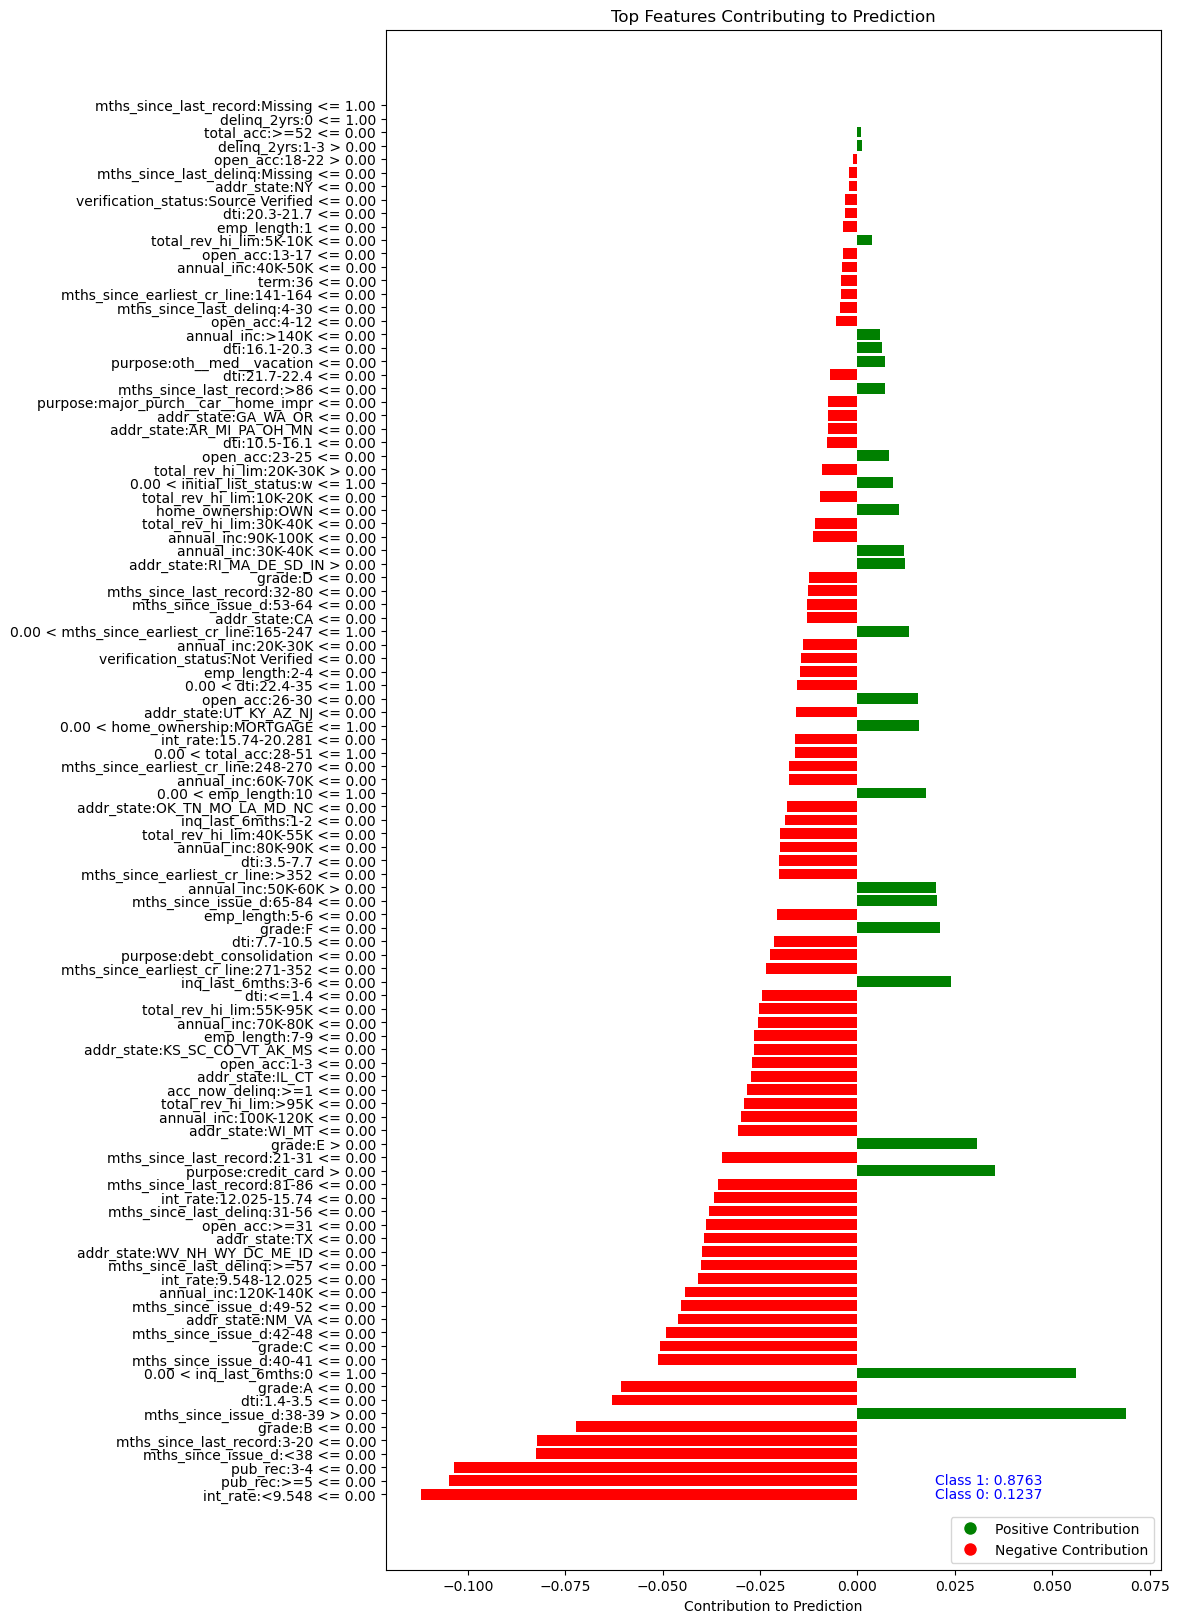

In [39]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Convert X_train to a NumPy array if it's not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, mode='classification', feature_names=list(inputs_train), random_state=42)

# Select a specific instance for local interpretation
instance_idx = 1  # Choose the index of the instance you want to interpret
instance = X_test_np[[instance_idx]]  # Use indexing for NumPy array

# Get the predicted probability for the selected instance
predicted_proba = xg_classifier.predict_proba(instance)

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(instance[0], xg_classifier.predict_proba, num_features=len(list(inputs_train)))

# Visualize the LIME explanation with predicted probabilities and color legend
top_features = explanation.as_list()  # Get top features and their contributions
feature_names, feature_contributions = zip(*top_features)

# Plot a bar chart for feature importance
plt.figure(figsize=(10, 20))
plt.barh(feature_names, feature_contributions, color=np.where(np.array(feature_contributions) > 0, 'green', 'red'))
plt.xlabel('Contribution to Prediction')
plt.title('Top Features Contributing to Prediction')

# Add predicted probabilities for each class
for i, class_prob in enumerate(predicted_proba[0]):
    plt.text(0.02, i, f'Class {i}: {class_prob:.4f}', color='blue', fontsize=10, ha='left', va='center')

# Add color legend
positive_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Positive Contribution')
negative_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Negative Contribution')

plt.legend(handles=[positive_patch, negative_patch], loc='lower right')
plt.show()


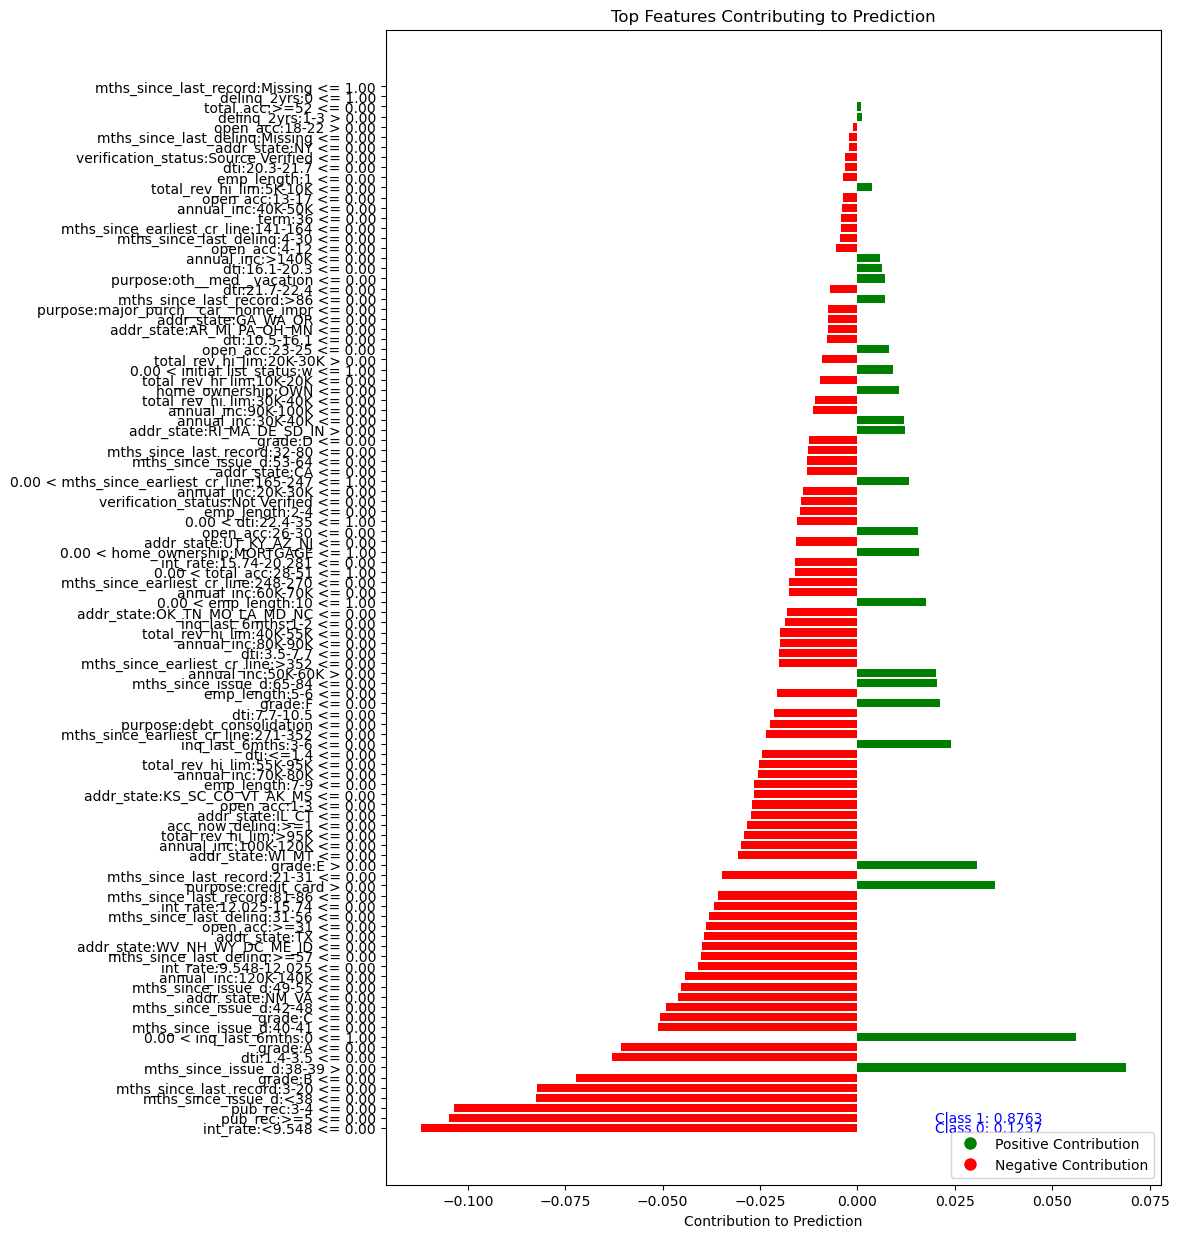

In [44]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Convert X_train to a NumPy array if it's not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Define the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, mode='classification', feature_names=list(inputs_train), random_state=42)

# Select a specific instance for local interpretation
instance_idx = 1  # Choose the index of the instance you want to interpret
instance = X_test_np[[instance_idx]]  # Use indexing for NumPy array

# Get the predicted probability for the selected instance
predicted_proba = xg_classifier.predict_proba(instance)

# Explain the prediction for the selected instance using LIME
explanation = explainer.explain_instance(instance[0], xg_classifier.predict_proba, num_features=len(list(inputs_train)))

# Visualize the LIME explanation with predicted probabilities and color legend
top_features = explanation.as_list()  # Get top features and their contributions
feature_names, feature_contributions = zip(*top_features)

# Plot a bar chart for feature importance with corrected color scheme
colors = ['green' if contribution > 0 else 'red' for contribution in feature_contributions]
plt.figure(figsize=(10, 15))
plt.barh(feature_names, feature_contributions, color=colors)
plt.xlabel('Contribution to Prediction')
plt.title('Top Features Contributing to Prediction')

# Add predicted probabilities for each class
for i, class_prob in enumerate(predicted_proba[0]):
    plt.text(0.02, i, f'Class {i}: {class_prob:.4f}', color='blue', fontsize=10, ha='left', va='center')

# Add color legend
positive_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Positive Contribution')
negative_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Negative Contribution')

plt.legend(handles=[positive_patch, negative_patch], loc='lower right')
plt.show()
